# 目录

####

In [1]:
#general packages
library(psych)
library(ggplot2)

Warning message:
"程辑包'psych'是用R版本4.2.3 来建造的"
Warning message:
"程辑包'ggplot2'是用R版本4.2.3 来建造的"

载入程辑包：'ggplot2'


The following objects are masked from 'package:psych':

    %+%, alpha




In [4]:
#cluster packages
library(cluster) #clustering

library(TSclust) #time series clustering

Warning message:
"程辑包'TSclust'是用R版本4.2.3 来建造的"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



## 读入可体松数据



In [5]:
#set filepath for data file
filepath <- "https://quantdev.ssri.psu.edu/sites/qdev/files/TheCortisolData.csv"
#read in the .csv file using the url() function
cortisol_wide <- read.csv(file=url(filepath),header=TRUE)

In [6]:
head(cortisol_wide,6)

,id,cort_0,cort_1,cort_2,cort_3,cort_4,cort_5,cort_6,cort_7,cort_8
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,4.2,4.1,9.7,14.0,19.0,18.0,20.0,23.0,24.0
2,2,5.5,5.6,14.0,16.0,19.0,17.0,18.0,20.0,19.0
3,3,4.0,3.8,7.5,12.0,14.0,13.0,9.1,8.2,7.9
4,4,6.1,5.6,14.0,20.0,26.0,23.0,26.0,25.0,26.0
5,5,4.6,4.4,7.2,12.3,15.8,16.1,17.0,17.8,19.1
6,6,6.8,9.5,14.2,19.6,19.0,13.9,13.4,12.5,11.7


## 整理时间序列数据

In [7]:
#reshaping wide to long
cortisol_long <- reshape(data=cortisol_wide, 
                         timevar=c("time"), 
                         idvar="id",
                         varying=c("cort_0","cort_1","cort_2","cort_3",
                                   "cort_4","cort_5","cort_6","cort_7","cort_8"),
                         direction="long", sep="_")
#sorting for easy viewing
# order by id and time
cortisol_long <- cortisol_long[order(cortisol_long$id,cortisol_long$time), ]

In [8]:
head(cortisol_long,18)

,id,time,cort
,<int>,<dbl>,<dbl>
1.0,1,0,4.2
1.1,1,1,4.1
1.2,1,2,9.7
1.3,1,3,14.0
1.4,1,4,19.0
1.5,1,5,18.0
1.6,1,6,20.0
1.7,1,7,23.0
1.8,1,8,24.0


## 绘制时间序列数据

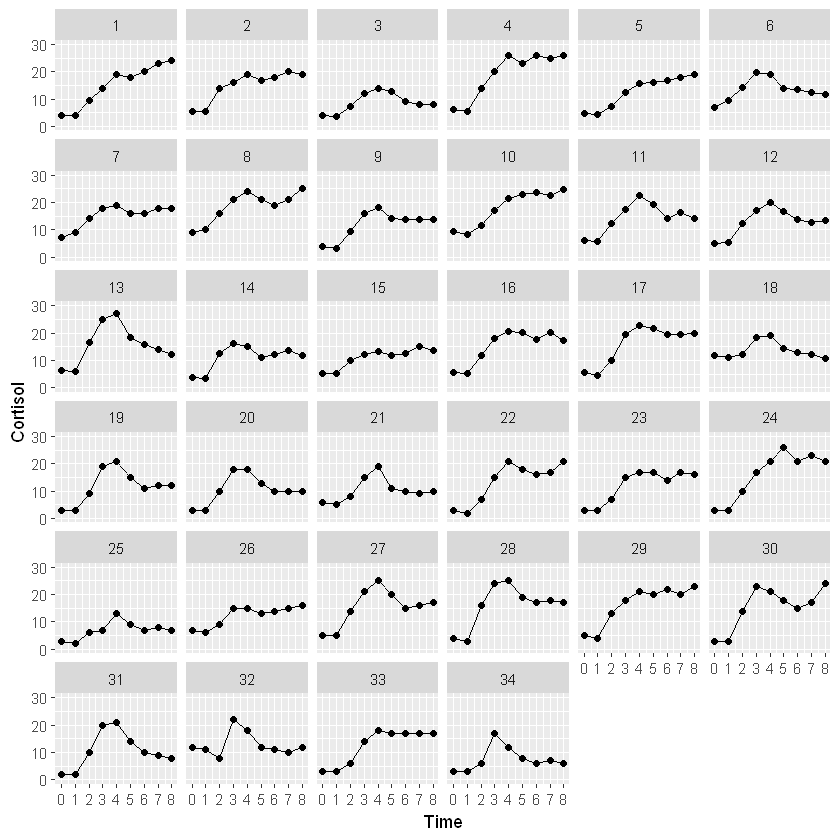

In [9]:
#intraindividual change trajetories by id
ggplot(data = cortisol_long, aes(x = time, y = cort, group = id)) +
  geom_point(color="black") + 
  geom_line(color="black")  +
  xlab("Time") + 
  ylab("Cortisol") + ylim(0,30) +
  scale_x_continuous(breaks=seq(0,8,by=1)) +
  facet_wrap(vars(id))

## 对时间序列数据聚类，并可视化


In [10]:
#making data into a matrix (without id variable)
cortmatrix <- as.matrix(cortisol_wide[ ,-1])
cortmatrix

cort_0,cort_1,cort_2,cort_3,cort_4,cort_5,cort_6,cort_7,cort_8
4.2,4.1,9.7,14.0,19.0,18.0,20.0,23.0,24.0
5.5,5.6,14.0,16.0,19.0,17.0,18.0,20.0,19.0
4.0,3.8,7.5,12.0,14.0,13.0,9.1,8.2,7.9
6.1,5.6,14.0,20.0,26.0,23.0,26.0,25.0,26.0
4.6,4.4,7.2,12.3,15.8,16.1,17.0,17.8,19.1
6.8,9.5,14.2,19.6,19.0,13.9,13.4,12.5,11.7
7.4,9.2,14.0,18.0,19.0,16.0,16.0,18.0,18.0
9.2,10.0,16.0,21.0,24.0,21.0,19.0,21.0,25.0
3.9,3.3,9.4,16.0,18.1,14.3,13.7,13.8,13.9
9.3,8.5,11.5,17.0,21.6,23.1,23.7,22.6,24.7


## 计算距离

In [11]:
#calculating dissimilarity matrix using TSclust diss() function
cort_dist <- diss(SERIES=cortmatrix, METHOD="DTW") #DTW = Dynamic Time Warping

#adding informative column names
names(cort_dist) <- cortisol_wide$id

#examine distance/dissimilarity matrix (only first 5 time-series for space reasons)
as.matrix(cort_dist)[1:5,1:5]

,1,2,3,4,5
1,0.0,22.3,89.4,24.9,28.2
2,22.3,0.0,73.6,41.6,13.8
3,89.4,73.6,0.0,127.8,58.1
4,24.9,41.6,127.8,0.0,51.4
5,28.2,13.8,58.1,51.4,0.0


## 基于距离聚类

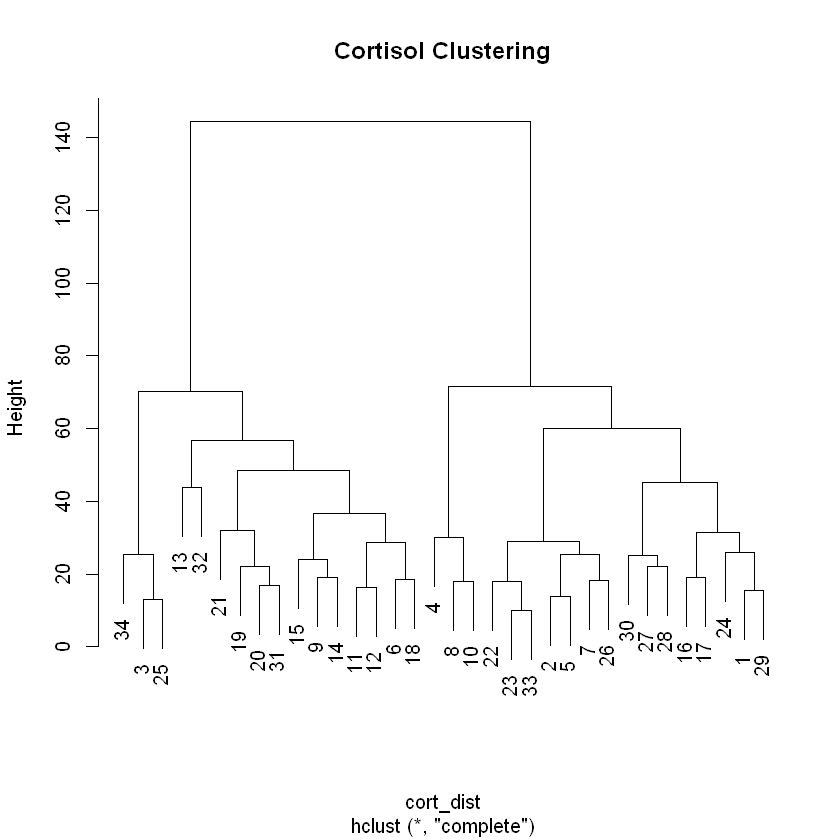

In [12]:
#perform hierachical clustering on the diss object
cort_hclust <- hclust(cort_dist, method="complete",members=names(cort_dist))
#show the resulting dendrogram
plot(cort_hclust, main="Cortisol Clustering")

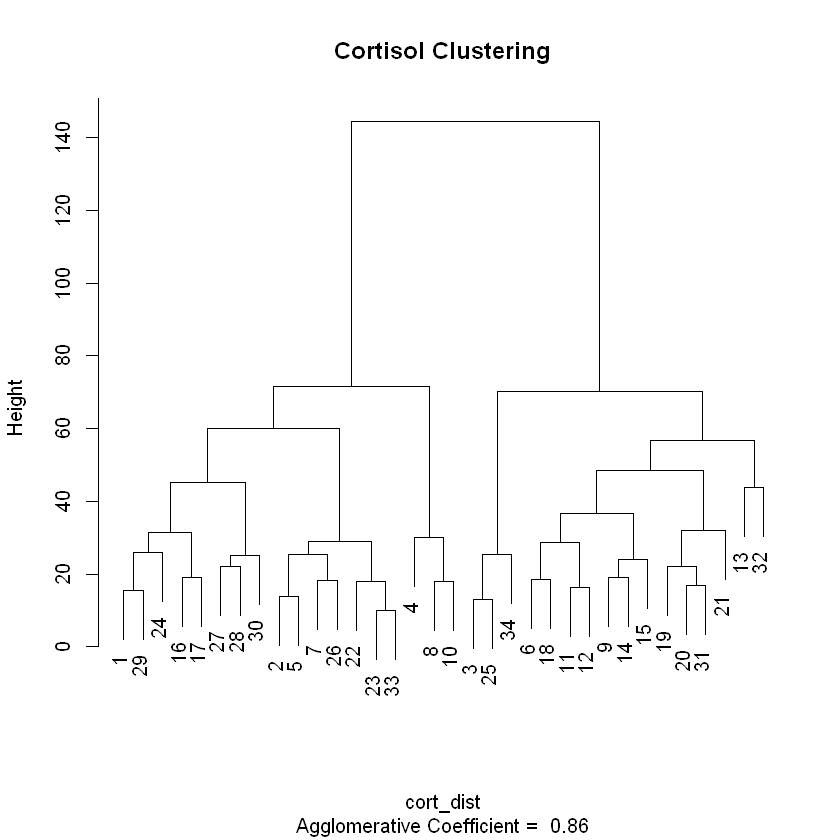

In [13]:
# Compute linkages
cort_agnesclust <- agnes(cort_dist, diss=TRUE, method="complete")
#show the resulting dendrogram
plot(cort_agnesclust, which.plot = 2, main = "Cortisol Clustering")

## 确定聚类的数量

In [14]:
##primary solution
#imposing number of clusters
cort_cluster2 <- cutree(cort_hclust, k = 2)
#examine cluster assignments
cort_cluster2

1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
 1  1  2  1  1  2  1  1  2  1  2  2  2  2  2  1  1  2  2  2  2  1  1  1  2  1 
27 28 29 30 31 32 33 34 
 1  1  1  1  2  2  1  2

In [15]:
#examine number of individuals in each cluster
table(cort_cluster2)

cort_cluster2
 1  2 
18 16 

In [16]:
#imposing number of clusters
cort_cluster4 <- cutree(cort_agnesclust, k = 4)
#examine cluster assignments
cort_cluster4

[1] 1 1 2 3 1 4 1 3 4 3 4 4 4 4 4 1 1 4 4 4 4 1 1 1 2 1 1 1 1 1 4 4 1 2

In [17]:
#examine number of individuals in each cluster
table(cort_cluster4)

cort_cluster4
 1  2  3  4 
15  3  3 13 

## 整理完善原来的数据，并可视化出来

In [18]:
#binding cluster solutions with the wide data
cortisol_widecluster <- cbind(cortisol_wide,cort_cluster2,cort_cluster4)

#reshaping to long data for plotting
#reshaping wide to long
cortisol_longcluster <- reshape(data=cortisol_widecluster, 
                         timevar=c("time"), 
                         idvar=c("id","cort_cluster2","cort_cluster4"),
                         varying=c("cort_0","cort_1","cort_2","cort_3",
                                   "cort_4","cort_5","cort_6","cort_7","cort_8"),
                         direction="long", sep="_")
#ordering by id and time for easy viewing
cortisol_longcluster <- cortisol_longcluster[order(cortisol_longcluster$id,cortisol_longcluster$time), ]

## 根据ID做简单展示

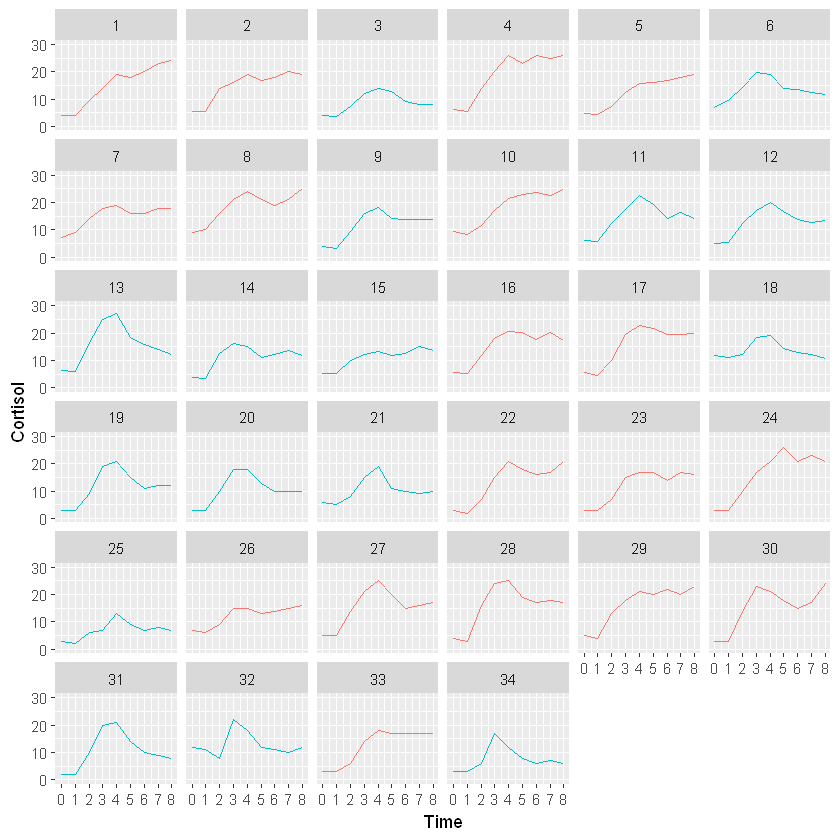

In [19]:
#2 cluster solution
#intraindividual change trajetories by ID
ggplot(data = cortisol_longcluster, aes(x = time, y = cort, group = id)) +
  #geom_point(aes(x = time, y = cort,color=factor(cort_cluster2))) + 
  geom_line(aes(x = time, y = cort,color=factor(cort_cluster2))) +
  xlab("Time") + 
  ylab("Cortisol") + ylim(0,30) +
  scale_x_continuous(breaks=seq(0,8,by=1)) +
  facet_wrap(vars(id)) +
  guides(color="none")

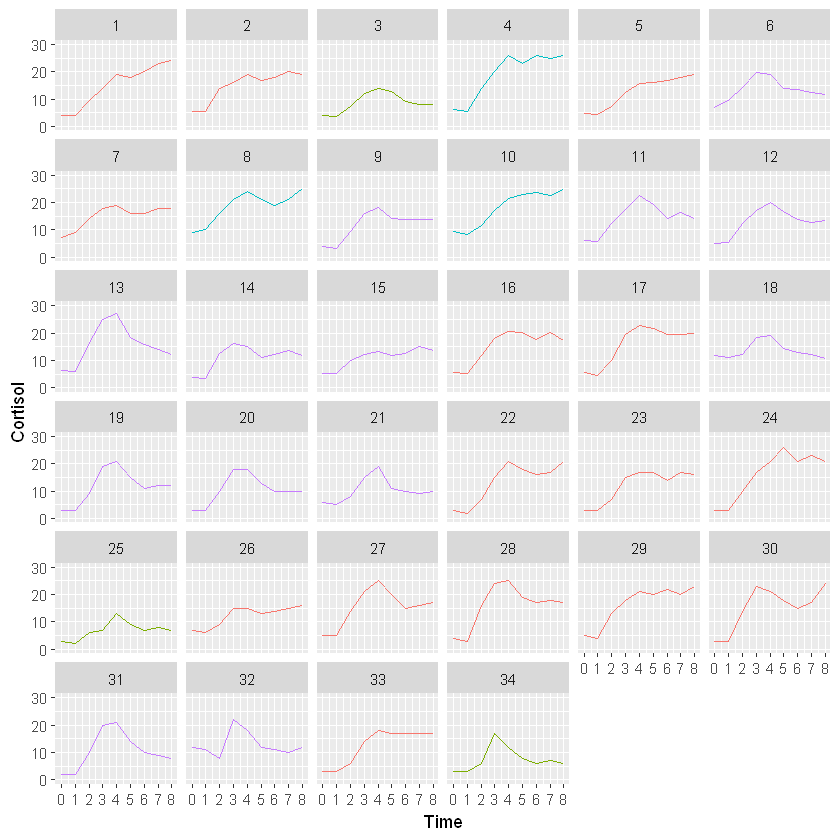

In [20]:
#4 cluster solution
#intraindividual change trajetories by ID
ggplot(data = cortisol_longcluster, aes(x = time, y = cort, group = id)) +
  #geom_point(aes(x = time, y = cort,color=factor(cort_cluster4))) + 
  geom_line(aes(x = time, y = cort,color=factor(cort_cluster4))) +
  xlab("Time") + 
  ylab("Cortisol") + ylim(0,30) +
  scale_x_continuous(breaks=seq(0,8,by=1)) +
  facet_wrap(vars(id)) +
  guides(color="none")

## 根据不同颜色对两组数据可视化

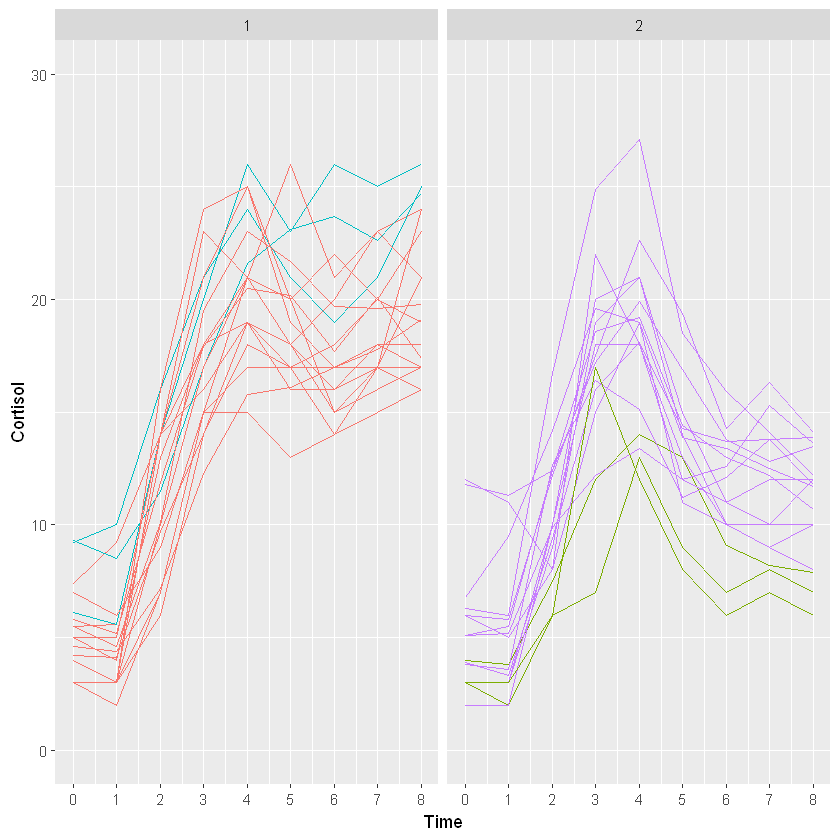

In [21]:
#intraindividual change trajetories by cluster
ggplot(data = cortisol_longcluster, aes(x = time, y = cort, group = id)) +
  #geom_point(aes(x = time, y = cort,color=factor(cort_cluster4))) + 
  geom_line(aes(x = time, y = cort,color=factor(cort_cluster4))) +
  xlab("Time") + 
  ylab("Cortisol") + ylim(0,30) +
  scale_x_continuous(breaks=seq(0,8,by=1)) +
  facet_wrap(vars(cort_cluster2)) +
  guides(color="none")